In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv("../data/FuelConsumptionCo2.csv")
print("data read in dataframe")

data read in dataframe


In [3]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

In [4]:
#Look at correlation table to see how each feature relates to CO2EMISSIONS
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
#Based on the correlation matrix, we want to remove features that are highly related (redundant)
# - ENGINESIZE and CYLINDERS are very similar (correlation = 0.93)
#   -> ENGINESIZE has a slightly stronger relation to CO2, so we drop CYLINDERS
# - FUELCONSUMPTION_COMB_MPG and other fuel consumption features (CITY, HWY, COMB) are also highly similar
#   -> FUELCONSUMPTION_COMB_MPG has the strongest (negative) correlation with CO2, so we keep it and drop the rest

# Drop the redundant columns from the DataFrame
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)


In [8]:
# Check the top 9 rows of the updated DataFrame
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


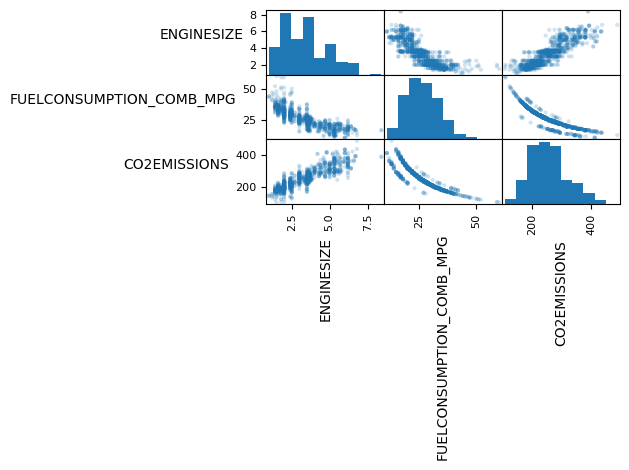

In [9]:
# Plot a scatter matrix to explore pairwise relationships and distributions of features
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# Rotate axis labels for better readability
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Adjust layout spacing and display the plot
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


In [10]:
#Extract input features (columns 0 and 1) as NumPy array
X = df.iloc[:, [0, 1]].to_numpy()

#  Extract target label (column 2) as NumPy array
y = df.iloc[:, [2]].to_numpy()

#  Import StandardScaler for feature standardization
from sklearn import preprocessing

# Create a scaler object to standardize features (mean=0, std=1)
std_scaler = preprocessing.StandardScaler()

# Fit scaler on X and transform features to standardized scale
X_std = std_scaler.fit_transform(X)

# Display basic statistics of standardized features for verification
pd.DataFrame(X_std).describe().round(2)


,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


<b>Create train and test datasets<b/>

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

<b>Build a multiple linear regression model<b/>

In [12]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [13]:
# Step 1: Get means and standard deviations used during standardization
means_ = std_scaler.mean_              # Mean of each original feature
std_devs_ = np.sqrt(std_scaler.var_)   # Std dev of each original feature

# Step 2: Calculate coefficients in original feature scale
coef_original = coef_ / std_devs_

# Step 3: Calculate intercept in original feature scale
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

# Step 4: Print them for interpretation
print('Coefficients (original scale):', coef_original)
print('Intercept (original scale):', intercept_original)

Coefficients (original scale): [[17.8581369  -5.01502179]]
Intercept (original scale): [329.1363967]


<b>Visualize model outputs<b/>

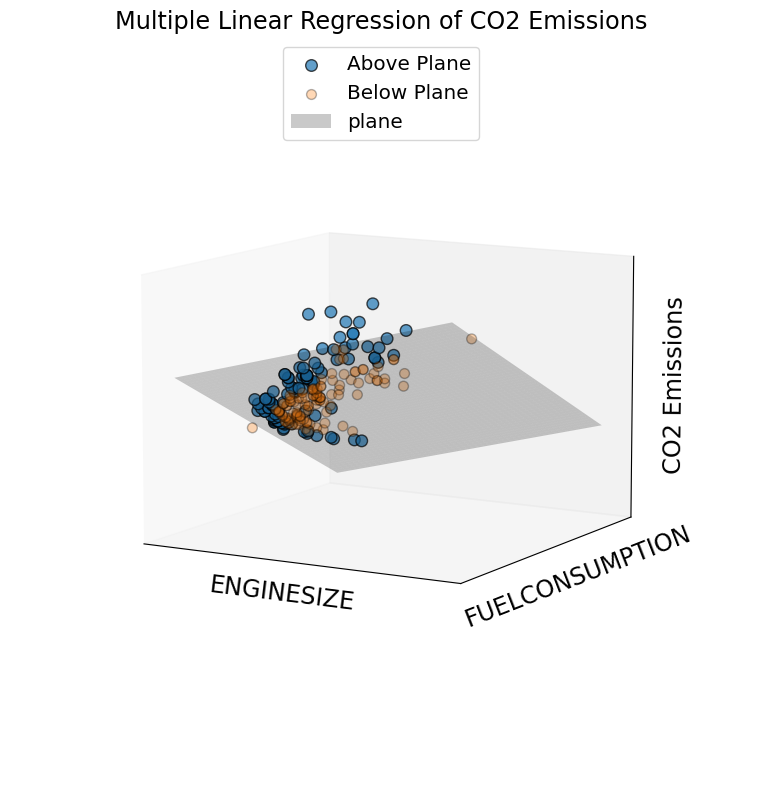

In [14]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

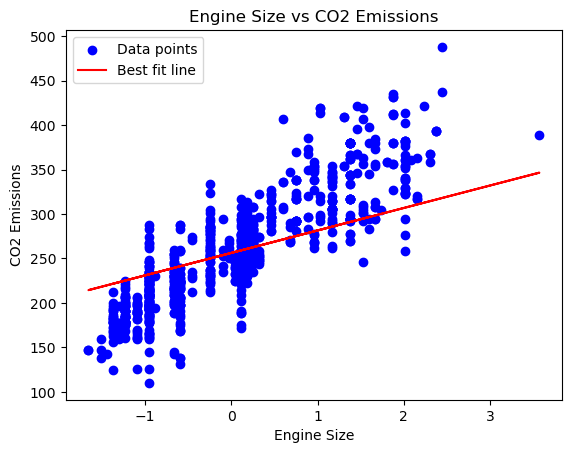

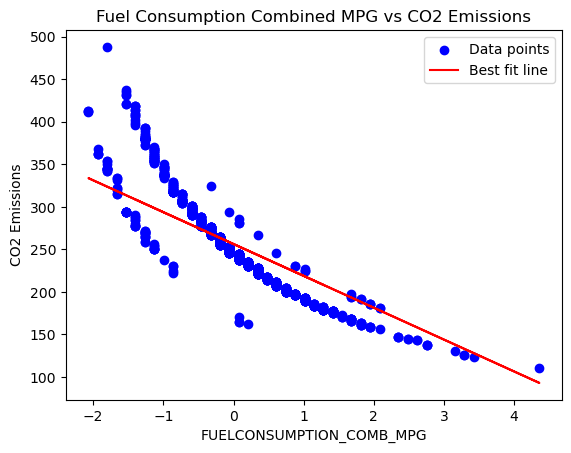

In [15]:
import matplotlib.pyplot as plt

# Plot 1: Engine Size vs CO2 Emissions
plt.scatter(X_train[:, 0], y_train, color='blue', label='Data points')
plt.plot(X_train[:, 0], coef_[0, 0] * X_train[:, 0] + intercept_[0], color='red', label='Best fit line')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Engine Size vs CO2 Emissions")
plt.legend()
plt.show()

# Plot 2: Fuel Consumption Combined MPG vs CO2 Emissions
plt.scatter(X_train[:, 1], y_train, color='blue', label='Data points')
plt.plot(X_train[:, 1], coef_[0, 1] * X_train[:, 1] + intercept_[0], color='red', label='Best fit line')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption Combined MPG vs CO2 Emissions")
plt.legend()
plt.show()


In [22]:
# Select the first feature (Engine size) from the training data
X_train_1 = X_train[:, 0]

# Create a LinearRegression model instance
regressor_1 = linear_model.LinearRegression()

# Fit the model to the training data
# Reshape X_train_1 to a 2D array as required by scikit-learn
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)

# Get the learned coefficient (slope) of the regression line
coef_1 = regressor_1.coef_

# Get the learned intercept (y-axis intercept) of the regression line
intercept_1 = regressor_1.intercept_

# Print the coefficients to understand the relationship between engine size and CO2 emission
print('Coefficients: ', coef_1)
print('Intercept: ', intercept_1)

Coefficients:  [[38.99297872]]
Intercept:  [126.28970217]


Text(0, 0.5, 'Emission')

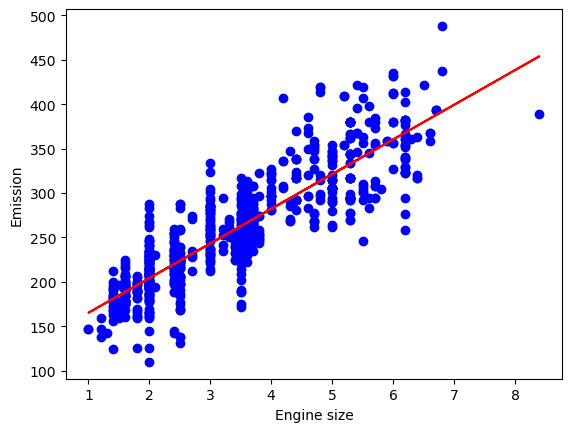

In [23]:
#Produce a scatterplot of CO2 emission against ENGINESIZE 
plt.scatter(X_train_1, y_train,  color='blue')
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'CO2 Emission')

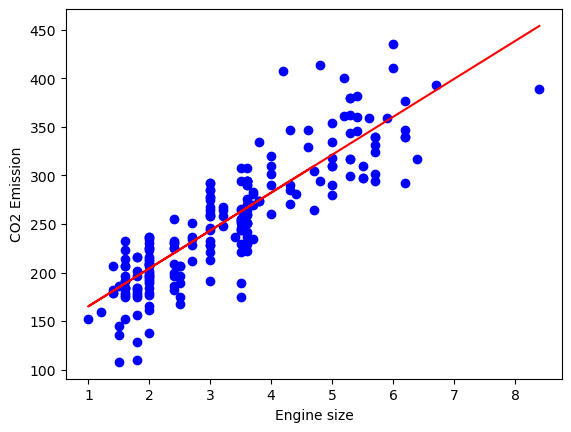

In [24]:
#Generate the same scatterplot and best-fit regression line
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

In [25]:
#Repeat the same modeling but use FUELCONSUMPTION_COMB_MPG as the independent variable instead
X_train_2 = X_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1, 1), y_train)
coef_2 =  regressor_2.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[-7.83880802]]
Intercept:  [463.36317263]


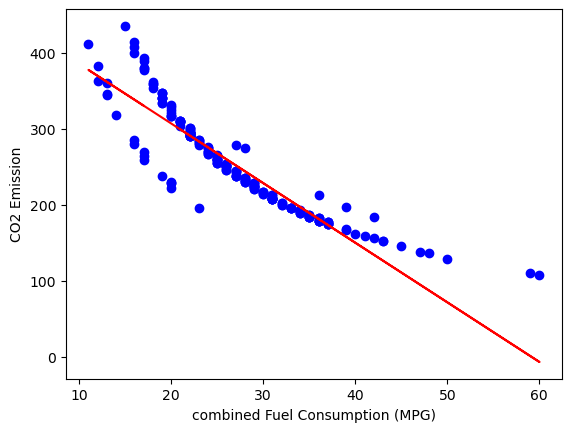

In [26]:
# Select the second feature (combined fuel consumption in MPG) from the test set
X_test_2 = X_test[:, 1]

# Create a scatter plot of the test feature vs CO2 emissions
plt.scatter(X_test_2, y_test, color='blue')

# Plot the regression line using the coefficient and intercept from the trained model
plt.plot(X_test_2, coef_2[0] * X_test_2 + intercept_2, '-r')

# Label the x-axis with the feature name
plt.xlabel("combined Fuel Consumption (MPG)")

# Label the y-axis with the target variable name
plt.ylabel("CO2 Emission")

# Show the plot
plt.show()
